#  Using Numpy for Building ANN - Matrix and Tensor Manipulations
Resources for numpy
http://www.scipy-lectures.org/intro/numpy/numpy.html

Writeup on affine functions: http://cfsv.synechism.org/c1/sec15.pdf

Notes: Above chapter gives great intro to index slicing, broadcasting, etc.  Dimension shuffling


# Building Simple Neural Nets

##  Include course outline

##  Objectives for Today
1.  Learn about numpy for doing vector and matrix manipulations - tensorflow is analogous to numpy matrix/tensors


## Using numpy for building neural nets

Numpy is an extension of python.  Numpy is designed to handle matrix manipulations in ways that are easy to code and which are optimized to execute rapidly.  The following code compares execution time for squaring a list of 1000 numbers to the time for squaring a numpy array of 1000 numbers.  As you can see from the results, the numpy array is more than an order of magnitude faster.  


In [1]:
l = range(1000)
%timeit [i ** 2 for i in l]

10000 loops, best of 3: 58.8 µs per loop


In [2]:
import numpy as np
a = np.arange(1000)
%timeit a ** 2

The slowest run took 13.47 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.46 µs per loop


## Intro to numpy
This material is excerpted from http://www.scipy-lectures.org/intro/numpy/numpy.html.  That gives an excellent summary and is worth scanning through.  

### Reference documentation  
On the web: http://docs.scipy.org/  
Interactive help:

In [3]:
help(np.array)

Help on built-in function array in module numpy.core.multiarray:

array(...)
    array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an
        object whose __array__ method returns an array, or any
        (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then
        the type will be determined as the minimum type required
        to hold the objects in the sequence.  This argument can only
        be used to 'upcast' the array.  For downcasting, use the
        .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy
        will only be made if __array__ returns a copy, if obj is a
        nested sequence, or if a copy is needed to satisfy any of the other
        requirements (`dtype`, `order`, etc.).

Looking for something:

In [4]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
numpy.lib.ar

In [5]:
help(np.lookfor)

Help on function lookfor in module numpy.lib.utils:

lookfor(what, module=None, import_modules=True, regenerate=False, output=None)
    Do a keyword search on docstrings.
    
    A list of of objects that matched the search is displayed,
    sorted by relevance. All given keywords need to be found in the
    docstring for it to be returned as a result, but the order does
    not matter.
    
    Parameters
    ----------
    what : str
        String containing words to look for.
    module : str or list, optional
        Name of module(s) whose docstrings to go through.
    import_modules : bool, optional
        Whether to import sub-modules in packages. Default is True.
    regenerate : bool, optional
        Whether to re-generate the docstring cache. Default is False.
    output : file-like, optional
        File-like object to write the output to. If omitted, use a pager.
    
    See Also
    --------
    source, info
    
    Notes
    -----
    Relevance is determined only ro

## Creating Arrays

In [6]:
#1-D Arrays
a = np.array([0, 1, 2, 3])
print('a ', a)
print('a.ndim ', a.ndim) # not a column nor row vector, just a vector
print('a.shape ', a.shape)
print('len(a) ', len(a))

('a ', array([0, 1, 2, 3]))
('a.ndim ', 1)
('a.shape ', (4L,))
('len(a) ', 4)


In [7]:
#2-D and 3-D arrays
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
print('b ', b)
print('b.ndim ', b.ndim)
print('b.shape ', b.shape)
print('len(b) ', len(b))     # returns the size of the first dimension
print()

c = np.array([[[1], [2]], [[3], [4]]])
print('c ', c)
print('c.shape ', c.shape)

('b ', array([[0, 1, 2],
       [3, 4, 5]]))
('b.ndim ', 2)
('b.shape ', (2L, 3L))
('len(b) ', 2)
()
('c ', array([[[1],
        [2]],

       [[3],
        [4]]]))
('c.shape ', (2L, 2L, 1L))


In [8]:
#Systematic ways to generate arrays
#from arange (or range)
print('np.arange(10) ', np.arange(10))
print('np.array(range(10)) ', np.array(range(10)))

#Evenly spaced points - notice that both ends are included in number of points
print('np.linspace(0.0, 3.0, 7)', np.linspace(0.0, 3.0, 6)) #(start, end, num_points)

('np.arange(10) ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
('np.array(range(10)) ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
('np.linspace(0.0, 3.0, 7)', array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ]))


In [9]:
#Common arrays
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
print('a ', a)
b = np.zeros((2,2))
print('b ', b)
c = np.eye(3)
print('c ', c)
d = np.diag(np.arange(1, 5))
print('d ', d)

('a ', array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]]))
('b ', array([[ 0.,  0.],
       [ 0.,  0.]]))
('c ', array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]]))
('d ', array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]]))


In [10]:
#Generating random arrays and matrices - you'll use this a lot for weight initialization
a = np.random.rand(4)       # uniform in [0, 1]
print('a ', a)

b = np.random.randn(4)      # Gaussian
print('b ', b)

c = np.random.randn(4) 
print('c ', c)

np.random.seed(1234)        # Setting the random seed to get repeatible random numbers

('a ', array([ 0.0173549 ,  0.33759695,  0.84751174,  0.92305194]))
('b ', array([ 0.20203725,  0.87405781,  1.45858625, -0.10480701]))
('c ', array([-0.35007788, -1.88988095,  0.04356146, -0.95138197]))


## Data types
Data types are more important in neural net calculations than in many other areas.  With neural nets data types can have a dramatic effect on the computation time.  Computations with float32 are much faster than with float64.  That's particularly true if you're doing calculations on a gpu.  In some cases gpu only supports float32.  

In [11]:
# with neural nets you need to pay attention to data types
# float64 is much more expensive to calculate than float32
a = np.array([1, 2, 3])
print(a.dtype)

b = np.array([1., 2., 3.])
print(b.dtype)

int32
float64


In [12]:
# here's a timing comparison.  The difference is even more pronounced for gpu calculations
import numpy as np

a = np.arange(1000, dtype='uint8')
print('int32')
%timeit a * a

a = np.arange(1000, dtype='float32')
print('float32')
%timeit a * a

a = np.arange(1000, dtype='float64')
print('float64')
%timeit a * a

int32
The slowest run took 12.74 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.57 µs per loop
float32
The slowest run took 20.72 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 803 ns per loop
float64
The slowest run took 12.94 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 923 ns per loop


## Plotting

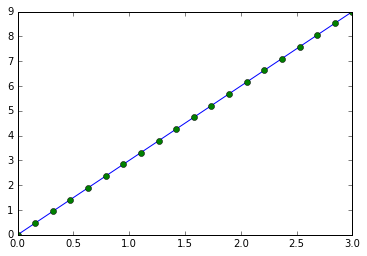

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot
plt.plot(x, y, 'o')  # dot plot
plt.show()           # <-- shows the plot (not needed with Ipython)

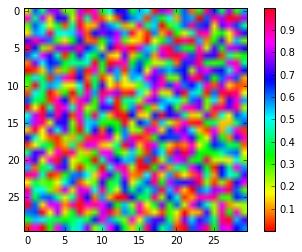

In [14]:
#plotting 2-D arrays (such as images)
image = np.random.rand(30, 30)
#possible colormaps autumn, bone, cool, copper flag gray hot hsv jet pink 
#prism spring summer winter 
plt.imshow(image, cmap=plt.cm.hsv)
plt.colorbar()
plt.show()

## Index slicing

In [15]:
#Here are some illustrative examples
a = np.arange(10)
print(a)
print(a[0], a[2], a[-1])


#Slicing
a = np.diag(np.arange(3))
print(a)

print(a[1, 1])

a[2, 1] = 10 # third line, second column
print(a)

print(a[1])

[0 1 2 3 4 5 6 7 8 9]
(0, 2, 9)
[[0 0 0]
 [0 1 0]
 [0 0 2]]
1
[[ 0  0  0]
 [ 0  1  0]
 [ 0 10  2]]
[0 1 0]


## Q
In the example above, the index a[1] prints the second (index 1) row from the matrix a.  How could you extract the second column?

Here's a nice illustration for index slicing.  It comes from scipy documentation http://www.scipy-lectures.org/intro/numpy/numpy.html
<img src="numpy_indexing.png">

## Copies and views
A slicing operation creates a view on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory.

When modifying the view, the original array is modified as well:

In [16]:
a = np.arange(10)
print(a)    #array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
b = a[::2]
print(b)    #array([0, 2, 4, 6, 8])
b[0] = 12
print(b)    #array([12,  2,  4,  6,  8])
print(a)    # array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

#if you want to make changes in b without affecting a
a = np.arange(10)
b = a[::2].copy()  # force a copy
b[0] = 12
print(b) 
print(a)

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[12  2  4  6  8]
[12  1  2  3  4  5  6  7  8  9]
[12  2  4  6  8]
[0 1 2 3 4 5 6 7 8 9]


In [17]:
a = np.ones((100,100))
a += a.T
a

array([[ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       ..., 
       [ 3.,  3.,  3., ...,  2.,  2.,  2.],
       [ 3.,  3.,  3., ...,  2.,  2.,  2.],
       [ 3.,  3.,  3., ...,  2.,  2.,  2.]])

## Indexing with masks
Numpy arrays can be indexed with slices, but also with boolean or integer arrays (masks). This method is called fancy indexing. It creates copies not view.

In [18]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
print(a)   #array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])
print(a % 3 == 0)  #array of trues and falses

#define a mask
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
print(extract_from_a)           # extract a sub-array of %3 == 0 with the mask 

[10  3  8  0 19 10 11  9 10  6  0 20 12  7 14]
[False  True False  True False False False  True False  True  True False
  True False False]
[ 3  0  9  6  0 12]


In [19]:
#Indexing with a mask can be very useful to assign a new value to a sub-array:  
a[a % 3 == 0] = -1
print(a)

[10 -1  8 -1 19 10 11 -1 10 -1 -1 20 -1  7 14]


## Indexing with an Array of Integers

In [20]:
a = np.arange(10)
a[::2] += 3 # to avoid having always the same np.arange(10)
print(a)    #array([ 3,  1,  5,  3,  7,  5,  9,  7, 11,  9])
print(a[[2, 5, 1, 8]]) # or, a[np.array([2, 5, 1, 8])]  #array([ 5,  5,  1, 11])

[ 3  1  5  3  7  5  9  7 11  9]
[ 5  5  1 11]


When a new array is created by indexing with an array of integers, the new array has the same shape than the array of integers:

In [21]:
a = np.arange(10, 20)
idx = np.array([[3, 4], [9, 7]])
print(a[idx])

[[13 14]
 [19 17]]


## Numerical operations on arrays
Element wise operations

In [22]:
a = np.arange(5)
print(a + 1)
print(a ** 2)

[1 2 3 4 5]
[ 0  1  4  9 16]


In [23]:
a = np.ones((3,3))
b = np.arange(9).reshape((3,3))
print(a * b)  #notice that this isn't matrix multiplication
print(a.dot(a))  #this is matrix multiplication
print(a + b)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]
[[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


## Reductions
Computing sums:

In [24]:
x = np.array([1, 2, 3, 4])
print(x.sum())

10


In [25]:
#Sum by rows and by columns:
x = np.array([[1,1],[2,2]])
print(x.sum(axis=0))
print(x.sum(axis=1))

[3 3]
[2 4]


In [26]:
x = np.array([[[1,1],[1,1]], [[2,2],[2,2]], [[3,3], [3,3]]])
print(x.shape)  #imagine this as 3-d rectangle h, w, d = 3, 2, 2

(3L, 2L, 2L)


In [27]:
print(x.sum(axis=0))
print(x.sum(axis=1))
print(x.sum(axis=2))

[[6 6]
 [6 6]]
[[2 2]
 [4 4]
 [6 6]]
[[2 2]
 [4 4]
 [6 6]]


Other reductions - stats, extrema and logical comparisons

In [28]:
x = np.arange(12)
print(x.mean())      #mean of array
print(np.median(x))    #median
print(x.std())       #standard deviation

np.random.shuffle(x)
print(x)
print (x.max(), x.argmax(), x.min(), x.argmin())

5.5
5.5
3.45205252953
[ 0  5 11  3  9  4  7  2  6  1 10  8]
(11, 2, 0, 0)


In [29]:
#logical comparisons
print(x > 5)
print(np.any(x > 5))
print(np.all(x>5))

[False False  True False  True False  True False  True False  True  True]
True
False


## Array shape manipulation

In [30]:
#Flattening

a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
#order (0,0), (0,1), (0,2), (1,0), (1,1), (1,2)
print(a.ravel())   #array([1, 2, 3, 4, 5, 6])  ()
print(a.T)         #array([[1, 4], [2, 5], [3, 6]])
#order (0,0), (0,1), (1,0), (1,1), (2,0), (2,1)
print(a.T.ravel())  #array([1, 4, 2, 5, 3, 6])

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]
[[1 4]
 [2 5]
 [3 6]]
[1 4 2 5 3 6]


In [31]:
#reshape makes flattened array back into original
print(a.shape)   #(2, 3)
b = a.ravel()   
print(b)     #array([1,2,3,4,5,6])
print(b.reshape((2, 3)))   #array([[1, 2, 3], [4, 5, 6]])

#reshape also operates on non-flat array - same as flattening and then reshaping
print(b.reshape((3,2)))

(2L, 3L)
[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [32]:
#leaving unspecified dimensions
print(np.arange(24).reshape((6, -1)))
print(np.arange(18).reshape((6, -1)))
print(np.arange(17).reshape((6, -1)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]


ValueError: total size of new array must be unchanged

## Broadcasting


    Basic operations on numpy arrays (addition, etc.) are elementwise

    This works on arrays of the same size.

        Nevertheless, It’s also possible to do operations on arrays of different
        sizes if Numpy can transform these arrays so that they all have
        the same size: this conversion is called broadcasting.

The image below gives an example of broadcasting:
<img src="numpy_broadcasting.png">

In [33]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
print('a ')
print(a)

b = np.array([0, 1, 2])
print('b')
print(b)
print('a + b ')
print(a + b)

a 
[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]
b
[0 1 2]
a + b 
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
